In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
df = pd.read_csv('flats_cleaned_v5.csv')

In [16]:
df.shape

(1002, 19)

In [17]:
df.head()

,society,price,place,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,"shovanalaya, joramandir",0.22,baguiati,3577.0,2.0,2.0,1,0.0,West,Old Property,East,653.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
1,maa sarada apartment bangur,0.38,bangur,4750.0,2.0,2.0,1,3.0,South,Moderately Old,North,684.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
2,chandroprova apartments,0.55,garia,8333.0,2.0,2.0,1,3.0,South,Old Property,South,749.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0
3,siddha happyville,0.82,rajarhat,6492.0,3.0,2.0,1,19.0,East,Relatively New,East,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0
4,rishi enclave apartment,0.36,rajarhat,3735.0,2.0,2.0,2,6.0,South-East,Old Property,East,836.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0


In [18]:
#removing society, because if the user knows the society, he will directly buy that society, he does not need ML help
#removing price_per_sqft, because it is correlated with price of flat
train_df = df.drop(columns=['society','price_per_sqft'])

In [19]:
train_df.head()

,price,place,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0.22,baguiati,2.0,2.0,1,0.0,West,Old Property,East,653.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
1,0.38,bangur,2.0,2.0,1,3.0,South,Moderately Old,North,684.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
2,0.55,garia,2.0,2.0,1,3.0,South,Old Property,South,749.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0
3,0.82,rajarhat,3.0,2.0,1,19.0,East,Relatively New,East,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0
4,0.36,rajarhat,2.0,2.0,2,6.0,South-East,Old Property,East,836.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0


# making luxury_score as a categorical.



<Axes: >

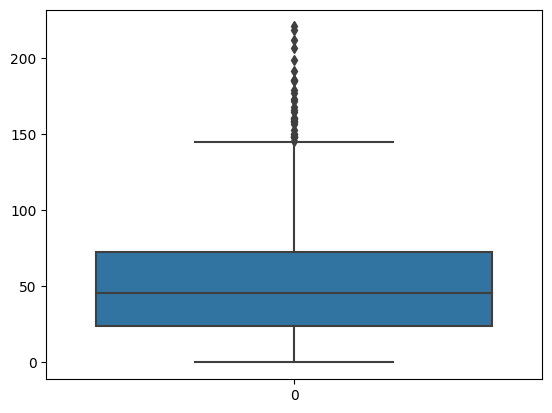

In [20]:
sns.boxplot(df['luxury_score'])

In [21]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 100:
        return "Medium"
    elif 100 <= score <= 250:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [22]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [23]:
train_df.head()

,price,place,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,0.22,baguiati,2.0,2.0,1,0.0,West,Old Property,East,653.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,Low
1,0.38,bangur,2.0,2.0,1,3.0,South,Moderately Old,North,684.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,Low
2,0.55,garia,2.0,2.0,1,3.0,South,Old Property,South,749.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0,Low
3,0.82,rajarhat,3.0,2.0,1,19.0,East,Relatively New,East,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,Medium
4,0.36,rajarhat,2.0,2.0,2,6.0,South-East,Old Property,East,836.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,Medium


# making floorNum as a categorical.

<Axes: >

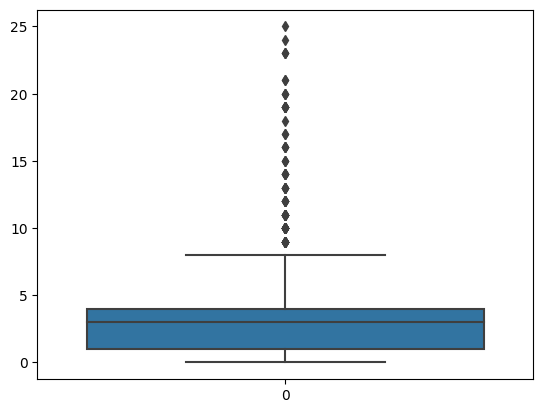

In [24]:
sns.boxplot(df['floorNum'])

In [25]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 7:
        return "Mid Floor"
    elif 8 <= floor <= 30:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [26]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [27]:
train_df.head()

,price,place,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,0.22,baguiati,2.0,2.0,1,0.0,West,Old Property,East,653.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,Low,Low Floor
1,0.38,bangur,2.0,2.0,1,3.0,South,Moderately Old,North,684.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,Low,Mid Floor
2,0.55,garia,2.0,2.0,1,3.0,South,Old Property,South,749.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0,Low,Mid Floor
3,0.82,rajarhat,3.0,2.0,1,19.0,East,Relatively New,East,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,Medium,High Floor
4,0.36,rajarhat,2.0,2.0,2,6.0,South-East,Old Property,East,836.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,Medium,Mid Floor


In [28]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [29]:
train_df.head()

,price,place,bedRoom,bathroom,balcony,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.22,baguiati,2.0,2.0,1,West,Old Property,East,653.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,Low Floor
1,0.38,bangur,2.0,2.0,1,South,Moderately Old,North,684.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Floor
2,0.55,garia,2.0,2.0,1,South,Old Property,South,749.0,0.0,0.0,0.0,0.0,0.0,2.0,Low,Mid Floor
3,0.82,rajarhat,3.0,2.0,1,East,Relatively New,East,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,High Floor
4,0.36,rajarhat,2.0,2.0,2,South-East,Old Property,East,836.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Mid Floor


# Converting categorial to numerical

In [30]:
#categorical - place,balcony,facing, agePossession, direction, luxury_category, floor_category
#numerical - others

In [31]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['agarpara', 'alipore', 'anandapur', 'anandpur', 'bagha jat',
       'baguiati', 'baguiati baguiati', 'bakultala', 'ballygunge',
       'bangur', 'bansdroni', 'barasat', 'barisha', 'barrackpore',
       'baruipur', 'batanagar', 'behala', 'behala, behala', 'beleghata',
       'bhadrakali', 'bhadreswar', 'bhawanipore', 'bijoygarh',
       'bishnupur', 'bonhooghly', 'bt road', 'ch', 'chotto chandpur',
       'dash drone', 'desopriya park', 'dhakuria', 'diamond park',
       'dum dum', 'dunlop', 'em bypass', 'fartabad', 'garia', 'gariahat',
       'golf club road', 'golf garden', 'h', 'haltu', 'haridevpur',
       'hazra', 'hooghly', 'howrah', 'hridaypur', 'ichapore', 'italgacha',
       'jadavpur', 'jat', 'jodhpur park', 'jogendra garden', 'joka',
       'kaikhali', 'kal', 'kalighat', 'kalikapur', 'kalyani', 'kamalgazi',
       'kankurgachi', 'kasba', 'kendua', 'khalisha kota', 'khardah',
       'konnagar', 'krishnapur', 'kudghat',
       'kumartuli(sovabazar sutanuti metro)', 'kum

**Note: Later in this notebook, we will use tree-based models.**  

*   **OrdinalEncoder is helpful when we perform tree-based algorithms. It gives a digit for each category.**
*   **when we want to use linear regression type of algorithms, we have to use one-hot-encoding. If we use OrdinalEncoder there, high values of some category may influence the model.**
*   **But tree based methods doesn't rely upon the values of the category. So, it is safe to use OrdinalEncoder there.**





In [32]:
X_label

,place,bedRoom,bathroom,balcony,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,5.0,2.0,2.0,1.0,7.0,2.0,0.0,653.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,9.0,2.0,2.0,1.0,4.0,0.0,1.0,684.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,36.0,2.0,2.0,1.0,4.0,2.0,2.0,749.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
3,104.0,3.0,2.0,1.0,0.0,3.0,0.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,104.0,2.0,2.0,2.0,5.0,2.0,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,81.0,3.0,4.0,1.0,0.0,1.0,2.0,2083.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0
998,99.0,1.0,1.0,1.0,5.0,0.0,2.0,442.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
999,74.0,2.0,2.0,2.0,3.0,2.0,2.0,728.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1000,16.0,2.0,2.0,1.0,1.0,2.0,2.0,662.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [33]:
y_label

0       0.22
1       0.38
2       0.55
3       0.82
4       0.36
        ... 
997     4.00
998     0.21
999     0.35
1000    0.30
1001    0.36
Name: price, Length: 1002, dtype: float64

#Feature selection

**Now, 8 feature selection techniques will be applied. At last, sum of scores from each techniques will be calculated.**

## Technique 1 - Correlation Analysis

<Axes: >

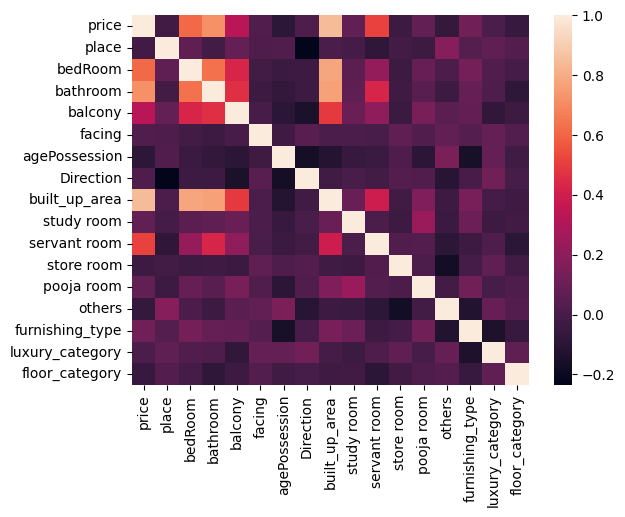

In [34]:
 sns.heatmap(data_label_encoded.corr())

In [35]:
#correlation wrt price
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,place,-0.023117
1,bedRoom,0.612053
2,bathroom,0.716810
3,balcony,0.324646
4,facing,0.022288
5,agePossession,-0.087142
6,Direction,0.018925
7,built_up_area,0.849347
8,study room,0.076255
9,servant room,0.512985


## Technique 2 - Random Forest Feature Importance

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,built_up_area,0.784399
0,place,0.049423
14,luxury_category,0.023954
2,bathroom,0.019406
6,Direction,0.019238
5,agePossession,0.017696
9,servant room,0.016179
3,balcony,0.015938
4,facing,0.015297
15,floor_category,0.013562


## Technique 3 - Gradient Boosting Feature importances

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
7,built_up_area,0.785965
0,place,0.043452
2,bathroom,0.039208
6,Direction,0.033879
9,servant room,0.033524
14,luxury_category,0.015074
15,floor_category,0.010420
4,facing,0.009409
3,balcony,0.009397
5,agePossession,0.008518


##Technique 4 - Permutation Importance

In [38]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,built_up_area,1.153990
5,agePossession,0.024502
3,balcony,0.021660
6,Direction,0.019994
0,place,0.018077
15,floor_category,0.010580
9,servant room,0.008375
14,luxury_category,0.006484
11,pooja room,0.001053
12,others,0.001035


## Technique 5 - LASSO

In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
7,built_up_area,0.484965
9,servant room,0.122186
2,bathroom,0.073342
6,Direction,0.008778
13,furnishing_type,0.006261
4,facing,0.002755
0,place,0.000000
5,agePossession,0.000000
8,study room,0.000000
12,others,-0.000000


## Technique 6 - RFE

In [40]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
7,built_up_area,0.782494
0,place,0.053704
2,bathroom,0.025733
6,Direction,0.023440
4,facing,0.016605
14,luxury_category,0.016101
9,servant room,0.015747
5,agePossession,0.014693
3,balcony,0.013552
15,floor_category,0.011970


## Technique 7 - Linear Regression Weights

In [42]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
7,built_up_area,0.531200
9,servant room,0.125085
2,bathroom,0.083535
6,Direction,0.019152
13,furnishing_type,0.017821
4,facing,0.012622
5,agePossession,0.011867
8,study room,0.010125
0,place,0.007036
14,luxury_category,0.003405


## Technique 8 - SHAP

In [44]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.9 MB/s eta 0:00:00


In [45]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


array([[-0.00051394, -0.00122981, -0.00721525, ..., -0.0020234 ,
        -0.00601554, -0.0096105 ],
       [ 0.03715085, -0.00172263, -0.0061598 , ..., -0.00126247,
        -0.00441889, -0.00566774],
       [ 0.02394723, -0.0002453 , -0.00669479, ...,  0.02905552,
        -0.00524378, -0.00372645],
       ...,
       [ 0.00690009, -0.00059071, -0.0071301 , ..., -0.00169648,
        -0.00435503, -0.00852962],
       [-0.01634422, -0.00069363, -0.00702676, ..., -0.00182832,
        -0.00447333, -0.00959345],
       [-0.00113607, -0.00123041, -0.00761406, ..., -0.00176769,
        -0.00926772, -0.01666223]])

In [46]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
7,built_up_area,0.340496
0,place,0.029853
6,Direction,0.023412
15,floor_category,0.022311
9,servant room,0.014588
2,bathroom,0.012930
14,luxury_category,0.010856
4,facing,0.008733
5,agePossession,0.008007
3,balcony,0.006036


## Total score

In [47]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')


In [48]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
place,-0.023117,0.049423,0.043452,0.018077,0.000000,0.053704,0.007036,0.029853
bedRoom,0.612053,0.011469,0.006373,-0.024032,-0.013645,0.010973,-0.060976,0.004768
bathroom,0.716810,0.019406,0.039208,-0.023345,0.073342,0.025733,0.083535,0.012930
balcony,0.324646,0.015938,0.009397,0.021660,-0.065702,0.013552,-0.081343,0.006036
facing,0.022288,0.015297,0.009409,-0.009199,0.002755,0.016605,0.012622,0.008733
agePossession,-0.087142,0.017696,0.008518,0.024502,0.000000,0.014693,0.011867,0.008007
Direction,0.018925,0.019238,0.033879,0.019994,0.008778,0.023440,0.019152,0.023412
built_up_area,0.849347,0.784399,0.785965,1.153990,0.484965,0.782494,0.531200,0.340496
study room,0.076255,0.001089,0.000136,0.000131,0.000000,0.001115,0.010125,0.000955


In [49]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [50]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.799271
place              0.044393
Direction          0.028098
servant room       0.020382
bathroom           0.018244
floor_category     0.017974
luxury_category    0.016494
agePossession      0.015475
balcony            0.013803
facing             0.010277
furnishing_type    0.005075
bedRoom            0.003720
others             0.003381
pooja room         0.001501
store room         0.001036
study room         0.000876
dtype: float64

**So, we can see others, pooja room, store room, study room are not important. We will drop these.**

**Before dropping we need to check whether it is effecting model performance or not.**

In [51]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [52]:
scores.mean()

0.7324145552749778

In [53]:
#with dropping the columns

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['others', 'pooja room','store room', 'study room' ]), y_label, cv=5, scoring='r2')

In [54]:
scores.mean()

0.7321202713329621

**so, performance is same. we can drop these now**

In [55]:
export_df = X_label.drop(columns=['others', 'pooja room','store room', 'study room'])
export_df['price'] = y_label

In [56]:
export_df.to_csv('flats_cleaned_v6.csv', index=False)

In [57]:
export_df

,place,bedRoom,bathroom,balcony,facing,agePossession,Direction,built_up_area,servant room,furnishing_type,luxury_category,floor_category,price
0,5.0,2.0,2.0,1.0,7.0,2.0,0.0,653.0,0.0,0.0,1.0,1.0,0.22
1,9.0,2.0,2.0,1.0,4.0,0.0,1.0,684.0,0.0,0.0,1.0,2.0,0.38
2,36.0,2.0,2.0,1.0,4.0,2.0,2.0,749.0,0.0,2.0,1.0,2.0,0.55
3,104.0,3.0,2.0,1.0,0.0,3.0,0.0,1080.0,0.0,0.0,2.0,0.0,0.82
4,104.0,2.0,2.0,2.0,5.0,2.0,0.0,836.0,0.0,0.0,2.0,2.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,81.0,3.0,4.0,1.0,0.0,1.0,2.0,2083.0,1.0,0.0,2.0,0.0,4.00
998,99.0,1.0,1.0,1.0,5.0,0.0,2.0,442.0,0.0,0.0,1.0,2.0,0.21
999,74.0,2.0,2.0,2.0,3.0,2.0,2.0,728.0,0.0,0.0,1.0,1.0,0.35
1000,16.0,2.0,2.0,1.0,1.0,2.0,2.0,662.0,0.0,0.0,1.0,1.0,0.30
